- 서비스의 이탈 고객 예측 모델 생성
- 고객 A가 어느 시점에 이탈을 할 것인지 예측할 수 있도록 모델을 학습시켜 보세요 

- 00 : 학습생 대기 - 무료
- 01 : 학습생 (준) - 물 
- 02 : 학습생 (일반) - 무료
- 11 : 학습생 (정) - 유료
- 44 : 만료 - 만
- 55 : 정_이월 - 유료

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('../deeplearning_n/activity_sample.csv')

In [3]:
data

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,...,11,11,44,44,44,44,44,44,999,25
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,...,11,11,44,44,44,44,44,44,999,25
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,...,11,11,44,44,44,44,44,44,999,25
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,...,11,11,44,44,44,44,44,44,999,25
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,...,11,11,44,44,44,44,44,44,999,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.026,M,...,1,1,1,1,44,44,44,44,999,27
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:18.280,M,...,1,1,1,1,44,44,44,44,999,27
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.366,M,...,1,1,1,1,44,44,44,44,999,27
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:40.089,M,...,1,1,1,1,44,44,44,44,999,27


In [4]:
data['userid'].unique()

array(['01cf7916-eb98-4d30-8c81-dd52aa5be060',
       '076bf224-16b8-48ca-b646-752a771b1dcc',
       '2bd83b70-6085-48d1-8433-6bef1f4fa584',
       '3a23c7e1-861a-41ce-a856-f16a4df5a5df',
       '4e478763-9937-4d47-b7da-a0113f860b52',
       '4ef416c9-de60-499e-b971-a780e076991e',
       '5b531894-59c3-4cf3-8fa4-eb1836fbd6b3',
       '676a004e-7c59-4edb-8af1-3bd963b98b29',
       '78d436d5-2adb-489b-bc1c-8c5b85d47d5c',
       '7aa6cf37-81af-4af8-a272-6a850e65e25c',
       '909c25d9-64ef-4e4f-b47f-4df50f02c07f',
       '91749c9e-af85-4f73-b252-2d05c04b508f',
       '943ee87d-d6d7-4ad4-b7dd-4ca171d8107e',
       'a11ea25b-593c-45f4-8c68-8e97b489e53a',
       'a130415d-5d44-4526-94bd-1a0892811572',
       'a3c0a30d-346f-4b58-967b-70ae79302871',
       'a9c80240-7734-401d-bddf-999d869e42a1',
       'b2d3b8c4-e954-4ed2-9078-c6c5493debea',
       'b3ddd47d-5c6f-44ba-9bd6-ff698a742f73',
       'b6d4d557-7343-4b61-8f06-ebbee45a0a81',
       'b8be7534-636b-4304-b3b2-ced246c3c1eb',
       'c25b0

In [5]:
data['memberstatus_change'].unique()

array(['11,44', '-,00,01,44', '00,01,44', '11,55,44', '-,02,01,44',
       '00,11,44'], dtype=object)

In [6]:
data.columns

Index(['Unnamed: 0', 'userid', 'learning_seq', 'mcode', 'learning_action_seq',
       'event_type', 'action', 'object_type', 'timestamp', 'gender', 'grade',
       'memberstatus', 'memberstatus_change', 'day_01_status', 'day_02_status',
       'day_03_status', 'day_04_status', 'day_05_status', 'day_06_status',
       'day_07_status', 'day_08_status', 'day_09_status', 'day_10_status',
       'day_11_status', 'day_12_status', 'day_13_status', 'day_14_status',
       'day_15_status', 'day_16_status', 'day_17_status', 'day_18_status',
       'day_19_status', 'day_20_status', 'day_21_status', 'day_22_status',
       'day_23_status', 'day_24_status', 'day_25_status', 'day_26_status',
       'day_27_status', 'day_28_status', 'day_29_status', 'day_30_status',
       'day_31_status', 'change_date'],
      dtype='object')

In [7]:
# 'timestamp' 열을 datetime 형식으로 변환
data['timestamp'] = pd.to_datetime(data['timestamp'])

# datetime을 UNIX 타임스탬프(초 단위)로 변환
data['timestamp'] = data['timestamp'].astype('int64') // 10**9  # 초 단위로 변환

# int32로 변환 (필요한 경우)
data['timestamp'] = data['timestamp'].astype('int32')

In [8]:
columns_to_encode = ['mcode', 'event_type', 'action', 'object_type', 'gender', 'grade']

In [9]:
data_encoded = pd.get_dummies(data, columns=columns_to_encode, dtype=int)

In [10]:
data_encoded

,Unnamed: 0,userid,learning_seq,learning_action_seq,timestamp,memberstatus,memberstatus_change,day_01_status,day_02_status,day_03_status,...,action_Resumed,action_Started,action_Viewed,object_type_DigitalResource,object_type_VideoObject,object_type_WebPage,gender_F,gender_M,gender_X,grade_5
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,1,1663198133,44,"11,44",11,11,11,...,0,0,1,1,0,0,0,1,0,1
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,2,1663198209,44,"11,44",11,11,11,...,0,0,0,1,0,0,0,1,0,1
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,3,1663198209,44,"11,44",11,11,11,...,0,0,1,1,0,0,0,1,0,1
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,4,1663198243,44,"11,44",11,11,11,...,0,0,0,1,0,0,0,1,0,1
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,5,1663198243,44,"11,44",11,11,11,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,35,1663755978,44,"-,00,01,44",-,-,-,...,0,0,1,1,0,0,0,1,0,1
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,36,1663755978,44,"-,00,01,44",-,-,-,...,0,0,0,1,0,0,0,1,0,1
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,37,1663755978,44,"-,00,01,44",-,-,-,...,0,0,1,1,0,0,0,1,0,1
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,38,1663756000,44,"-,00,01,44",-,-,-,...,0,0,0,1,0,0,0,1,0,1


In [11]:
columns_list = list(data_encoded.columns)

# 열 이름 출력
for column in columns_list:
    print(column)

Unnamed: 0
userid
learning_seq
learning_action_seq
timestamp
memberstatus
memberstatus_change
day_01_status
day_02_status
day_03_status
day_04_status
day_05_status
day_06_status
day_07_status
day_08_status
day_09_status
day_10_status
day_11_status
day_12_status
day_13_status
day_14_status
day_15_status
day_16_status
day_17_status
day_18_status
day_19_status
day_20_status
day_21_status
day_22_status
day_23_status
day_24_status
day_25_status
day_26_status
day_27_status
day_28_status
day_29_status
day_30_status
day_31_status
change_date
mcode_T0EE52U02001
mcode_T0EE52U02002
mcode_T0EE52U02003
mcode_T0EE52U02035
mcode_T0EE52U03001
mcode_T0EE52U07002
mcode_T0EE52U07003
mcode_T0EE52U13001
mcode_T0EE52U14001
mcode_T0EE52U20002
mcode_T0EE52U21001
mcode_T0EE52U53004
mcode_T0EE52U53005
mcode_T0EE52U53006
mcode_T0EE52U54001
mcode_T0EE52U54002
mcode_T0FE50U01002
mcode_T0FE50U01004
mcode_T0HE90U36014
mcode_T0KE42U01002
mcode_T0KE52U02002
mcode_T0KE52U02003
mcode_T0KE52U02004
mcode_T0KE52U02005
mcod

In [12]:
# 삭제할 열 목록
columns_to_drop = [ 'timestamp',
    'Unnamed: 0', 'userid', 'memberstatus', 'memberstatus_change',
    'day_01_status', 'day_02_status', 'day_03_status', 'day_04_status',
    'day_05_status', 'day_06_status', 'day_07_status', 'day_08_status',
    'day_09_status', 'day_10_status', 'day_11_status', 'day_12_status',
    'day_13_status', 'day_14_status', 'day_15_status', 'day_16_status',
    'day_17_status', 'day_18_status', 'day_19_status', 'day_20_status',
    'day_21_status', 'day_22_status', 'day_23_status', 'day_24_status',
    'day_25_status', 'day_26_status', 'day_27_status', 'day_28_status',
    'day_29_status', 'day_30_status', 'day_31_status', 'grade_5'
]

# 지정된 열 삭제
active_data = data_encoded.drop(columns=columns_to_drop, errors='ignore')

In [13]:
active_data

,learning_seq,learning_action_seq,change_date,mcode_T0EE52U02001,mcode_T0EE52U02002,mcode_T0EE52U02003,mcode_T0EE52U02035,mcode_T0EE52U03001,mcode_T0EE52U07002,mcode_T0EE52U07003,...,action_Restarted,action_Resumed,action_Started,action_Viewed,object_type_DigitalResource,object_type_VideoObject,object_type_WebPage,gender_F,gender_M,gender_X
0,1,1,25,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,2,25,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,3,25,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,1,4,25,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,5,25,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,2,35,27,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6472,2,36,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6473,2,37,27,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6474,2,38,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [14]:
X = active_data.drop(columns=['change_date'])
y = active_data['change_date']

In [15]:
# 훈련 세트와 테스트 세트로 분할 (80% 훈련 + 검증, 20% 테스트)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 훈련 세트와 검증 세트로 분할 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [18]:
print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)

훈련 세트 크기: (4144, 226)
검증 세트 크기: (1036, 226)
테스트 세트 크기: (1296, 226)


In [19]:
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential([
    Dense(64, input_dim=X_train.shape[1],activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') # Linear activation for regression (default is linear)
])

model.compile(optimizer='adam', loss='mean_squared_error',  metrics=[RootMeanSquaredError()])

C:\ProgramData\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          14,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # 에포크 수는 필요에 따라 조정
    batch_size=32
)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 304.5535 - root_mean_squared_error: 17.1805 - val_loss: 24.7155 - val_root_mean_squared_error: 4.9715
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 18.7839 - root_mean_squared_error: 4.3021 - val_loss: 12.5764 - val_root_mean_squared_error: 3.5463
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 9.2080 - root_mean_squared_error: 3.0333 - val_loss: 10.0096 - val_root_mean_squared_error: 3.1638
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 8.2050 - root_mean_squared_error: 2.8638 - val_loss: 9.2502 - val_root_mean_squared_error: 3.0414
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 6.8264 - root_mean_squared_error: 2.6097 - val_loss: 9.0323 - val_root_mean_squared_error: 3.0054
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 6.9939 - root_mean_squared_error: 2.6437 - val_loss: 8.7536 - val_root_mean_squared_error: 2.9587
Epoch 7/100
130/130 ━━━━━━━━━

In [24]:
val_loss, val_rmse = model.evaluate(X_val, y_val)
print(f"검증 세트 손실: {val_loss:.4f}")
print(f"검증 세트 RMSE: {val_rmse:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 4.2848 - root_mean_squared_error: 2.0595
검증 세트 손실: 4.7564
검증 세트 RMSE: 2.1809


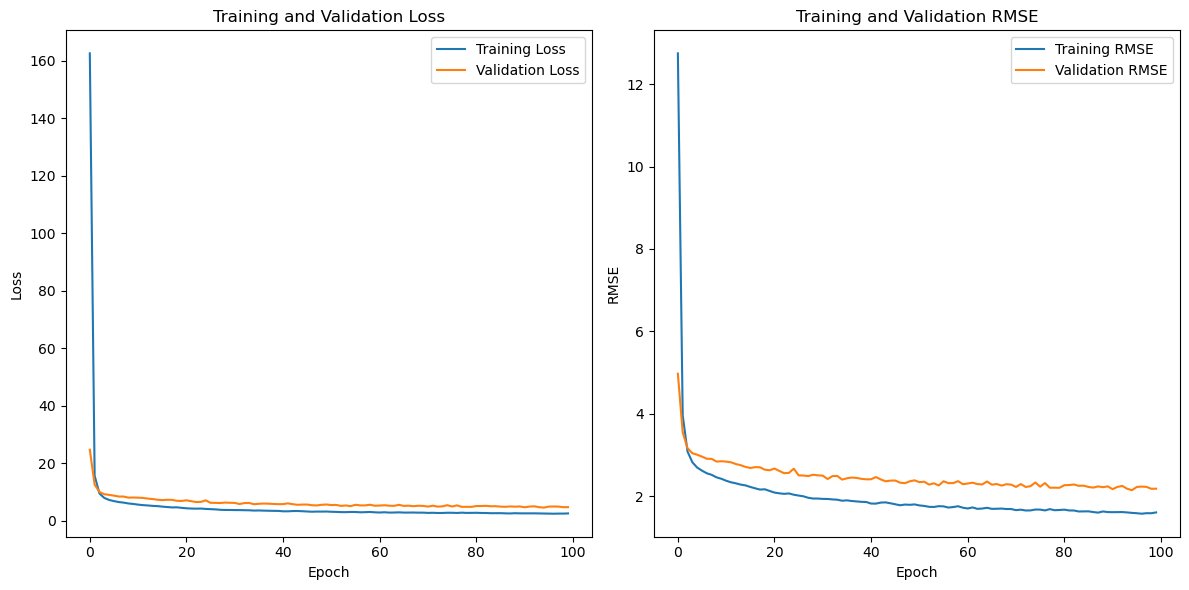

In [25]:
# 손실 및 RMSE 시각화
plt.figure(figsize=(12, 6))

# 손실 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# RMSE 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()

plt.savefig('loss_and_rmse_plot_FISRT.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import r2_score

# 예측
y_pred_val = model.predict(X_val).flatten()  # 예측 결과를 1차원으로 변환

# 손실과 RMSE 값 계산
val_loss, val_rmse = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation RMSE: {val_rmse}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
Validation Loss: 4.756389141082764
Validation RMSE: 2.1809146404266357


In [27]:
# R² 점수 계산
val_r2 = r2_score(y_val, y_pred_val)
print(f"Validation R² Score: {val_r2}")

Validation R² Score: 0.7415860891342163


In [28]:
# 예측 결과와 실제 결과 비교
comparison_df = pd.DataFrame({
    'Actual': y_val.values,
    'Predicted': y_pred_val
})

In [29]:
# 무작위로 10개의 인덱스 선택
np.random.seed(42)  # 결과 재현을 위해 시드 설정
random_indices = np.random.choice(comparison_df.index, size=10, replace=False)
random_indices.sort()  # 선택된 인덱스 정렬 (선택 사항)

In [30]:
# 선택된 인덱스에 해당하는 데이터만 필터링
sample_df = comparison_df.loc[random_indices]

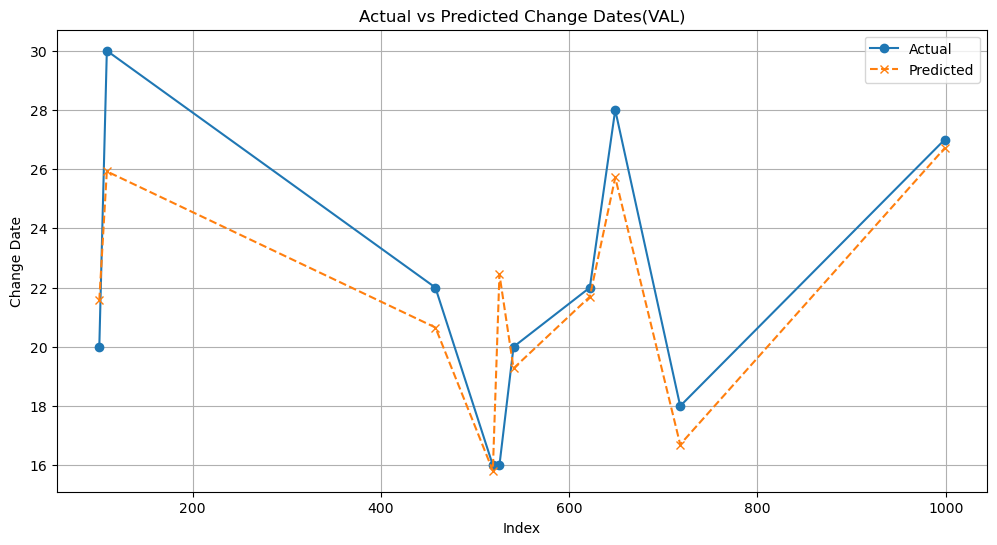

In [31]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(sample_df.index, sample_df['Actual'], label='Actual', marker='o', linestyle='-')
plt.plot(sample_df.index, sample_df['Predicted'], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Change Date')
plt.title('Actual vs Predicted Change Dates(VAL)')
plt.legend()
plt.grid(True)
plt.savefig('Actual_vs_Predicted_Change_Dates_VAL', dpi=300, bbox_inches='tight')  # 파일 이름, 해상도, 여백 설정
plt.show()

In [32]:
print("\nValidation Set 예측 vs 실제 값")
for i in range(len(comparison_df)):
    print(f"예측: {int(comparison_df['Predicted'].iloc[i])}, 실제: {int(comparison_df['Actual'].iloc[i])}")


Validation Set 예측 vs 실제 값
예측: 21, 실제: 22
예측: 29, 실제: 29
예측: 23, 실제: 22
예측: 26, 실제: 27
예측: 18, 실제: 18
예측: 23, 실제: 22
예측: 19, 실제: 20
예측: 18, 실제: 19
예측: 18, 실제: 20
예측: 29, 실제: 30
예측: 21, 실제: 24
예측: 17, 실제: 18
예측: 19, 실제: 20
예측: 18, 실제: 18
예측: 26, 실제: 27
예측: 23, 실제: 24
예측: 22, 실제: 24
예측: 26, 실제: 24
예측: 20, 실제: 20
예측: 21, 실제: 24
예측: 24, 실제: 22
예측: 25, 실제: 24
예측: 17, 실제: 18
예측: 21, 실제: 22
예측: 15, 실제: 16
예측: 26, 실제: 27
예측: 27, 실제: 25
예측: 21, 실제: 22
예측: 17, 실제: 20
예측: 16, 실제: 18
예측: 21, 실제: 27
예측: 17, 실제: 18
예측: 17, 실제: 18
예측: 30, 실제: 30
예측: 23, 실제: 20
예측: 18, 실제: 18
예측: 30, 실제: 30
예측: 19, 실제: 20
예측: 27, 실제: 27
예측: 27, 실제: 29
예측: 21, 실제: 22
예측: 22, 실제: 22
예측: 21, 실제: 22
예측: 30, 실제: 30
예측: 23, 실제: 29
예측: 26, 실제: 27
예측: 20, 실제: 18
예측: 17, 실제: 18
예측: 23, 실제: 24
예측: 23, 실제: 24
예측: 26, 실제: 27
예측: 22, 실제: 22
예측: 24, 실제: 24
예측: 21, 실제: 27
예측: 19, 실제: 20
예측: 22, 실제: 24
예측: 18, 실제: 18
예측: 23, 실제: 24
예측: 26, 실제: 27
예측: 19, 실제: 18
예측: 24, 실제: 24
예측: 19, 실제: 20
예측: 28, 실제: 29
예측: 18, 실제: 19
예측: 26, 실제: 2

In [33]:
# 테스트 세트 예측
y_pred_test = model.predict(X_test).flatten()

# 테스트 세트 손실과 RMSE 계산
test_loss, test_rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test RMSE: {test_rmse}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
Test Loss: 3.965388536453247
Test RMSE: 1.9913283586502075


In [34]:
# 테스트 세트 R² 점수 계산
test_r2 = r2_score(y_test, y_pred_test)
print(f"Test R² Score: {test_r2}")

Test R² Score: 0.776566743850708


In [35]:
# 테스트 세트에서 예측
y_pred = model.predict(X_test)

# 예측 결과를 DataFrame으로 변환 (옵션)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


In [36]:
# 예측 결과 확인
pred_df.head()

,Actual,Predicted
2095,18,17.778015
2415,16,15.996287
3045,20,19.967035
351,27,26.194016
5494,24,23.885088


In [37]:
test_comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_test
})

In [38]:
# 무작위로 10개의 인덱스 선택
np.random.seed(42)  # 결과 재현을 위해 시드 설정
random_indices = np.random.choice(test_comparison_df.index, size=10, replace=False)
random_indices.sort()  # 선택된 인덱스 정렬 (선택 사항)

In [39]:
# 선택된 인덱스에 해당하는 데이터만 필터링
sample_test_df = test_comparison_df.loc[random_indices]

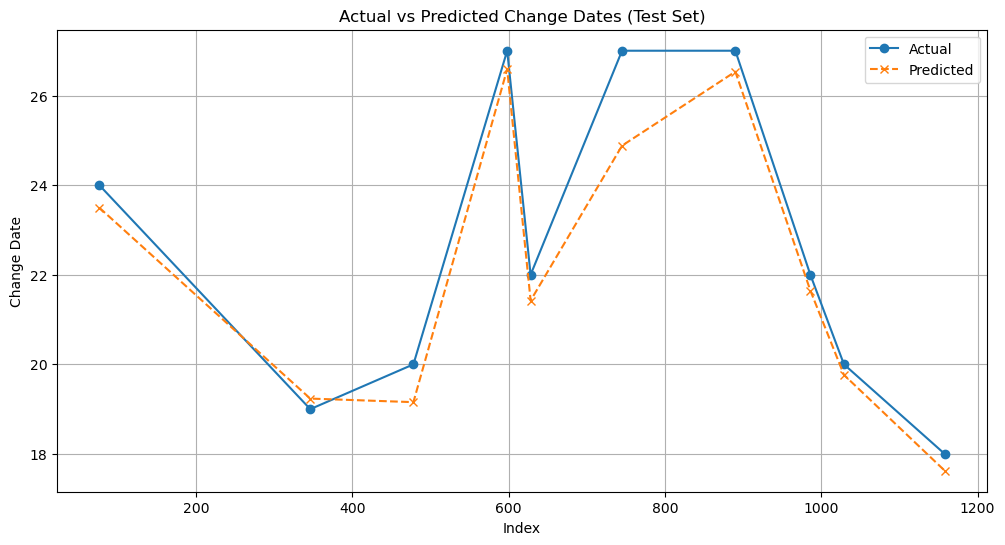

In [40]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(sample_test_df.index, sample_test_df['Actual'], label='Actual', marker='o', linestyle='-')
plt.plot(sample_test_df.index, sample_test_df['Predicted'], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Change Date')
plt.title('Actual vs Predicted Change Dates (Test Set)')
plt.legend()
plt.grid(True)
plt.savefig('Actual_vs_Predicted_Change_Dates_Test_Set', dpi=300, bbox_inches='tight')  # 파일 이름, 해상도, 여백 설정
plt.show()

In [41]:
print("\nTest Set 예측 vs 실제 값")
for i in range(len(test_comparison_df)):
    print(f"예측: {int(test_comparison_df['Predicted'].iloc[i])}, 실제: {int(test_comparison_df['Actual'].iloc[i])}")


Test Set 예측 vs 실제 값
예측: 17, 실제: 18
예측: 15, 실제: 16
예측: 19, 실제: 20
예측: 26, 실제: 27
예측: 23, 실제: 24
예측: 27, 실제: 29
예측: 17, 실제: 18
예측: 20, 실제: 18
예측: 25, 실제: 30
예측: 19, 실제: 19
예측: 20, 실제: 22
예측: 18, 실제: 18
예측: 18, 실제: 19
예측: 22, 실제: 18
예측: 25, 실제: 20
예측: 17, 실제: 18
예측: 18, 실제: 19
예측: 23, 실제: 20
예측: 19, 실제: 19
예측: 19, 실제: 20
예측: 21, 실제: 22
예측: 26, 실제: 24
예측: 15, 실제: 16
예측: 29, 실제: 30
예측: 24, 실제: 24
예측: 17, 실제: 18
예측: 19, 실제: 20
예측: 22, 실제: 22
예측: 18, 실제: 18
예측: 23, 실제: 24
예측: 25, 실제: 27
예측: 24, 실제: 18
예측: 18, 실제: 18
예측: 18, 실제: 18
예측: 18, 실제: 19
예측: 20, 실제: 19
예측: 21, 실제: 22
예측: 24, 실제: 27
예측: 28, 실제: 29
예측: 24, 실제: 22
예측: 27, 실제: 28
예측: 28, 실제: 29
예측: 25, 실제: 25
예측: 23, 실제: 18
예측: 18, 실제: 21
예측: 15, 실제: 16
예측: 26, 실제: 30
예측: 29, 실제: 30
예측: 26, 실제: 27
예측: 23, 실제: 24
예측: 19, 실제: 19
예측: 21, 실제: 27
예측: 24, 실제: 27
예측: 25, 실제: 22
예측: 24, 실제: 24
예측: 24, 실제: 27
예측: 30, 실제: 30
예측: 25, 실제: 22
예측: 19, 실제: 19
예측: 19, 실제: 20
예측: 27, 실제: 27
예측: 26, 실제: 27
예측: 26, 실제: 27
예측: 25, 실제: 27
예측: 24, 실제: 24
예측: 